In [11]:
%load_ext autoreload
import sys
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
%autoreload

import numpy as np
import pickle

import main


import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc_file('matplotlibrc')

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10,10]


import darkhistory.physics as phys
import darkhistory.utilities as utils
import darkhistory.spec.transferfunction as tf
import darkhistory.spec.spectools as spectools

from darkhistory.spec.spectrum import Spectrum

from darkhistory.electrons.ics.ics_spectrum import ics_spec
from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec
from darkhistory.electrons.elec_cooling import get_elec_cooling_tf_fast

from darkhistory.electrons import positronium

from scipy.interpolate import interp1d


In [117]:
test = positronium.weighted_photon_spec(photeng)
print(test.toteng()/phys.me)

2.000000000081069


# Marching Up Algorithm

In [3]:
ics_thomson_ref_tf, ics_rel_ref_tf, engloss_ref_tf = main.load_ics_data()


********* Thomson regime scattered photon spectrum *********
Initializing...
Computing spectra by an expansion in beta...
----> Computation by expansion in beta complete!
Computing spectra by analytic series...
*** Computing series 1/12...
*** Computing series 2/12...
*** Computing series 3/12...
*** Computing series 4/12...
*** Computing series 5/12...
*** Computing series 6/12...
*** Computing series 7/12...
*** Computing series 8/12...
*** Computing series 9/12...
*** Computing series 10/12...
*** Computing series 11/12...
*** Computing series 12/12...
----> Computation by analytic series complete!
Spectrum computed!
********* Relativistic regime scattered photon spectrum *********
Initializing...
Computing series 1/4...
Computing series 2/4...
Computing series 3/4...
Computing series 4/4...
Relativistic Computation Complete!
********* Thomson regime energy loss spectrum *********
Computing nonrelativistic energy loss spectrum...
Computing energy loss spectrum by beta expansion...
C

In [252]:
# pickle.dump(ics_thomson_ref_tf, open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/ics_thomson_ref_tf.raw", "wb"))
# pickle.dump(ics_rel_ref_tf, open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/ics_rel_ref_tf.raw", "wb"))
# pickle.dump(engloss_ref_tf, open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/engloss_ref_tf.raw", "wb"))

In [6]:
ics_thomson_ref_tf=pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/ics_thomson_ref_tf.raw", "rb")) 
ics_rel_ref_tf=pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/ics_rel_ref_tf.raw", "rb"))
engloss_ref_tf=pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/engloss_ref_tf.raw", "rb"))

In [19]:
eleceng = 10**np.arange(0, np.log10(5e12), 0.0254)
photeng = 10**np.arange(-4, np.log10(5e12), 0.0334)


rs = 600
xe = 1e-2

b_ne = get_elec_cooling_tf_fast(
    ics_thomson_ref_tf, ics_rel_ref_tf, engloss_ref_tf,
    eleceng, photeng, rs, xe, xHe=0, check_conservation_eng=True, verbose=True
)

***************************************************
rs:  600
injected energy:  3018.5613014197993
Energy in low energy electrons:  2901.5033866429544
Energy in photons:  2672.465405639954
Continuum_engloss:  2630.8410816593823
Energy in photons - Continuum:  41.62432398057172
Deposited in ionization:  40.13101763419823
Deposited in excitation:  27.849077070964242
Deposited in heating:  7.512255692570628
Energy is conserved up to (%):  -0.0019466095133564652
Deposited in ICS:  -0.058759601460041236
Energy conservation with deposited (%):  3.5350055804430864e-15
***************************************************
***************************************************
rs:  600
injected energy:  3200.368594586517
Energy in low energy electrons:  2963.5165441332792
Energy in photons:  5388.308057390493
Continuum_engloss:  5301.769888667906
Energy in photons - Continuum:  86.5381687225863
Deposited in ionization:  79.94052164842176
Deposited in excitation:  55.56557386696665
Deposited in heatin

***************************************************
rs:  600
injected energy:  22049.563679696334
Energy in low energy electrons:  6522.551264461986
Energy in photons:  207749.68906122702
Continuum_engloss:  195835.3714361692
Energy in photons - Continuum:  11914.317625057825
Deposited in ionization:  1896.3610961514414
Deposited in excitation:  1387.643420848909
Deposited in heating:  332.9701874690835
Energy is conserved up to (%):  -0.019410426233747217
Deposited in ICS:  -4.279914292921151
Energy conservation with deposited (%):  4.796258373632832e-14
***************************************************
***************************************************
rs:  600
injected energy:  23377.604122746896
Energy in low energy electrons:  6643.6529469780735
Energy in photons:  217677.44269840387
Continuum_engloss:  204669.58407027702
Energy in photons - Continuum:  13007.85862812685
Deposited in ionization:  1955.1079634934918
Deposited in excitation:  1432.4593362570395
Deposited in heati

***************************************************
rs:  600
injected energy:  95148.0736351758
Energy in low energy electrons:  8971.923345587515
Energy in photons:  516586.05854540196
Continuum_engloss:  436321.75039488985
Energy in photons - Continuum:  80264.30815051211
Deposited in ionization:  3074.555067020422
Deposited in excitation:  2306.6103899742566
Deposited in heating:  540.1853803222294
Energy is conserved up to (%):  -0.009993579352133339
Deposited in ICS:  -9.508698240681335
Energy conservation with deposited (%):  -8.010476722880185e-14
***************************************************
***************************************************
rs:  600
injected energy:  100878.82149492695
Energy in low energy electrons:  9040.334545284182
Energy in photons:  531983.6572012189
Continuum_engloss:  446121.9493861178
Energy in photons - Continuum:  85861.70781510108
Deposited in ionization:  3107.2527650786355
Deposited in excitation:  2332.7981169146215
Deposited in heating: 

***************************************************
rs:  600
injected energy:  828323.5329759169
Energy in low energy electrons:  10248.470333892095
Energy in photons:  1554599.303724454
Continuum_engloss:  743688.3742855305
Energy in photons - Continuum:  810910.9294389235
Deposited in ionization:  3683.6967407995303
Deposited in excitation:  2804.2713153347336
Deposited in heating:  692.386834815361
Energy is conserved up to (%):  -0.0019583758281020067
Deposited in ICS:  -16.221687847962706
Energy conservation with deposited (%):  -3.841522553539442e-14
***************************************************
***************************************************
rs:  600
injected energy:  878213.2798980062
Energy in low energy electrons:  10257.938456716385
Energy in photons:  1610345.3312901324
Continuum_engloss:  749564.6368744998
Energy in photons - Continuum:  860780.6944156325
Deposited in ionization:  3688.20846626512
Deposited in excitation:  2808.084867454657
Deposited in heating: 

***************************************************
rs:  600
injected energy:  3574374.062644804
Energy in low energy electrons:  10352.102258233377
Energy in photons:  4401661.395072712
Continuum_engloss:  844931.7055463567
Energy in photons - Continuum:  3556729.689526355
Deposited in ionization:  3733.0756326098913
Deposited in excitation:  2846.3918682470726
Deposited in heating:  731.2353064814534
Energy is conserved up to (%):  -0.0005156692276669386
Deposited in ICS:  -18.431947123147445
Energy conservation with deposited (%):  1.0620249865481307e-14
***************************************************
***************************************************
rs:  600
injected energy:  3789657.8379947124
Energy in low energy electrons:  10353.116320664041
Energy in photons:  4619257.165786073
Continuum_engloss:  847246.4444266228
Energy in photons - Continuum:  3772010.72135945
Deposited in ionization:  3733.5587850028105
Deposited in excitation:  2846.8117936131925
Deposited in heatin

***************************************************
rs:  600
injected energy:  19489468.698620453
Energy in low energy electrons:  10361.868347246367
Energy in photons:  20344153.677431613
Continuum_engloss:  872361.1535340796
Energy in photons - Continuum:  19471792.523897532
Deposited in ionization:  3737.7287970249354
Deposited in excitation:  2850.4654916650047
Deposited in heating:  745.1444591665589
Energy is conserved up to (%):  -9.765464865105984e-05
Deposited in ICS:  -19.032372174280596
Energy conservation with deposited (%):  -3.753561641482273e-14
***************************************************
***************************************************
rs:  600
injected energy:  20663315.17564482
Energy in low energy electrons:  10361.914039819796
Energy in photons:  21517999.989295773
Continuum_engloss:  872361.2756519582
Energy in photons - Continuum:  20645638.713643815
Deposited in ionization:  3737.7505689616005
Deposited in excitation:  2850.484917283379
Deposited in he

***************************************************
rs:  600
injected energy:  94536604.59579653
Energy in low energy electrons:  10362.279149016606
Energy in photons:  95391287.00122079
Continuum_engloss:  872362.2508756919
Energy in photons - Continuum:  94518924.7503451
Deposited in ionization:  3737.9245454154757
Deposited in excitation:  2850.6411071624075
Deposited in heating:  748.033522722755
Energy is conserved up to (%):  -2.013280777674146e-05
Deposited in ICS:  -19.03287290092075
Energy conservation with deposited (%):  2.008841247634575e-14
***************************************************
***************************************************
rs:  600
injected energy:  100230523.80778983
Energy in low energy electrons:  10362.28134194156
Energy in photons:  101085206.17042033
Continuum_engloss:  872362.256810347
Energy in photons - Continuum:  100212843.91360998
Deposited in ionization:  3737.9255903235553
Deposited in excitation:  2850.6420582727155
Deposited in heating: 

***************************************************
rs:  600
injected energy:  384768933.89378875
Energy in low energy electrons:  10362.298228376
Energy in photons:  385623615.71307635
Continuum_engloss:  872362.3018911667
Energy in photons - Continuum:  384751253.4111852
Deposited in ionization:  3737.933637642177
Deposited in excitation:  2850.649419551313
Deposited in heating:  748.63441560895
Energy is conserved up to (%):  -4.946630551207951e-06
Deposited in ICS:  -19.033097631039958
Energy conservation with deposited (%):  -1.171435722019864e-15
***************************************************
***************************************************
rs:  600
injected energy:  407943483.4160956
Energy in low energy electrons:  10362.298371247442
Energy in photons:  408798165.2240503
Continuum_engloss:  872362.302249818
Energy in photons - Continuum:  407925802.9218005
Deposited in ionization:  3737.9337057644448
Deposited in excitation:  2850.6494825205195
Deposited in heating:  74

***************************************************
rs:  600
injected energy:  2224333998.4851065
Energy in low energy electrons:  10362.299513614904
Energy in photons:  2225188680.1359835
Continuum_engloss:  872362.3051201126
Energy in photons - Continuum:  2224316317.8308635
Deposited in ionization:  3737.934250464637
Deposited in excitation:  2850.649988340549
Deposited in heating:  748.8039785373649
Energy is conserved up to (%):  -8.556938022772504e-07
Deposited in ICS:  -19.03348659396441
Energy conservation with deposited (%):  -7.07186240589611e-14
***************************************************
***************************************************
rs:  600
injected energy:  2358305153.2776523
Energy in low energy electrons:  10362.299518362746
Energy in photons:  2359159834.9264135
Continuum_engloss:  872362.3051320683
Energy in photons - Continuum:  2358287472.6212816
Deposited in ionization:  3737.9342527285953
Deposited in excitation:  2850.6499904671364
Deposited in heat

***************************************************
rs:  600
injected energy:  10789467222.298275
Energy in low energy electrons:  10362.299556244845
Energy in photons:  10790321903.91897
Continuum_engloss:  872362.3052275394
Energy in photons - Continuum:  10789449541.613743
Deposited in ionization:  3737.9342707925393
Deposited in excitation:  2850.650007499383
Deposited in heating:  748.8345769320207
Energy is conserved up to (%):  -1.7641167444539312e-07
Deposited in ICS:  -19.03387495384436
Energy conservation with deposited (%):  -4.482843102431844e-14
***************************************************
***************************************************
rs:  600
injected energy:  11439314495.393038
Energy in low energy electrons:  10362.299556481117
Energy in photons:  11440169177.013214
Continuum_engloss:  872362.3052281354
Energy in photons - Continuum:  11439296814.707987
Deposited in ionization:  3737.93427090521
Deposited in excitation:  2850.6500076065367
Deposited in heat

Energy in low energy electrons:  10362.299558471965
Energy in photons:  66131079629.78935
Continuum_engloss:  872362.3052331635
Energy in photons - Continuum:  66130207267.484116
Deposited in ionization:  3737.9342718545886
Deposited in excitation:  2850.6500085127177
Deposited in heating:  748.842724706478
Energy is conserved up to (%):  -2.8782740827421365e-08
Deposited in ICS:  -19.034078214401678
Energy conservation with deposited (%):  -1.97202152972857e-14
***************************************************
***************************************************
rs:  600
injected energy:  70113234068.67345
Energy in low energy electrons:  10362.299558480883
Energy in photons:  70114088750.28604
Continuum_engloss:  872362.305233186
Energy in photons - Continuum:  70113216387.9808
Deposited in ionization:  3737.9342718588414
Deposited in excitation:  2850.6500085168145
Deposited in heating:  748.8428460412764
Energy is conserved up to (%):  -2.7147577778611767e-08
Deposited in ICS:  -1

Deposited in ICS:  -19.035658141972394
Energy conservation with deposited (%):  -2.1728090972258926e-15
***************************************************
***************************************************
rs:  600
injected energy:  575704998249.3273
Energy in low energy electrons:  10362.29955856507
Energy in photons:  575705852930.939
Continuum_engloss:  872362.3052333993
Energy in photons - Continuum:  575704980568.6338
Deposited in ionization:  3737.9342718989897
Deposited in excitation:  2850.6500085556495
Deposited in heating:  748.8455470641939
Energy is conserved up to (%):  -3.306538362230955e-09
Deposited in ICS:  -19.03573418231401
Energy conservation with deposited (%):  -2.995250719878423e-14
***************************************************
***************************************************
rs:  600
injected energy:  610379585558.5289
Energy in low energy electrons:  10362.299558565326
Energy in photons:  610380440240.1401
Continuum_engloss:  872362.3052333998
Energy

***************************************************
rs:  600
injected energy:  1966074633879.0986
Energy in low energy electrons:  10362.299558567454
Energy in photons:  1966075488560.7095
Continuum_engloss:  872362.3052334053
Energy in photons - Continuum:  1966074616198.4043
Deposited in ionization:  3737.9342719001265
Deposited in excitation:  2850.6500085567704
Deposited in heating:  748.8466738264361
Energy is conserved up to (%):  -9.682327702458275e-10
Deposited in ICS:  -19.03602872452548
Energy conservation with deposited (%):  -7.63796958877795e-15
***************************************************
***************************************************
rs:  600
injected energy:  2084490883097.2844
Energy in low energy electrons:  10362.29955856752
Energy in photons:  2084491737778.8945
Continuum_engloss:  872362.3052334054
Energy in photons - Continuum:  2084490865416.5894
Deposited in ionization:  3737.9342719001584
Deposited in excitation:  2850.6500085568027
Deposited in hea

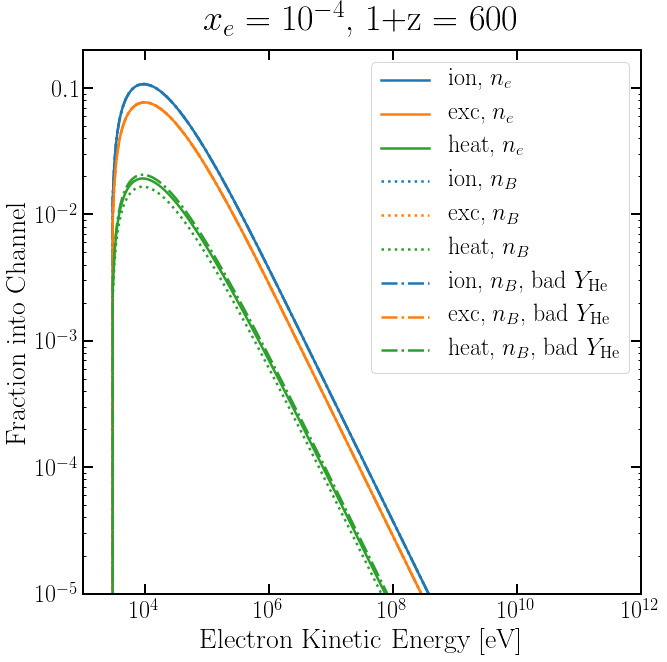

In [25]:
plt.figure()

ax = plt.gca()
ax.loglog()

plt.xlabel('Electron Kinetic Energy [eV]')
plt.ylabel('Fraction into Channel')
plt.title(r'$x_e = 10^{-4}$, 1+z = 600')

plt.axis([1e3, 1e12, 1e-5, 0.2])

plt.plot(eleceng, b_ne[2]/eleceng, label=r'ion, $n_e$', color='C0')
plt.plot(eleceng, b_ne[3]/eleceng, label=r'exc, $n_e$', color='C1')
plt.plot(eleceng, b_ne[4]/eleceng, label=r'heat, $n_e$', color='C2')
plt.plot(eleceng, b_nB[2]/eleceng, label=r'ion, $n_B$', color='C0', linestyle=':')
plt.plot(eleceng, b_nB[3]/eleceng, label=r'exc, $n_B$', color='C1', linestyle=':')
plt.plot(eleceng, b_nB[4]/eleceng, label=r'heat, $n_B$', color='C2', linestyle=':')
plt.plot(eleceng, b_nB_bad_YHe[2]/eleceng, label=r'ion, $n_B$, bad $Y_\mathrm{He}$', color='C0', linestyle='-.')
plt.plot(eleceng, b_nB_bad_YHe[3]/eleceng, label=r'exc, $n_B$, bad $Y_\mathrm{He}$', color='C1', linestyle='-.')
plt.plot(eleceng, b_nB_bad_YHe[4]/eleceng, label=r'heat, $n_B$, bad $Y_\mathrm{He}$', color='C2', linestyle='-.')


plt.legend()

In [26]:
b_nB_bad_YHe[4]/b_ne[4]

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        